# Importing Dependancies

In [30]:
import numpy as np
import pandas as pd
import warnings
import copy
warnings.filterwarnings("ignore")

# Read csv using Pandas

[CSV Source](https://archive.ics.uci.edu/ml/datasets/online+news+popularity)

In [31]:
# read data into dataframe
df = pd.read_csv("./OnlineNewsPopularity.csv") 

# Dropping Attributes

Attributes 0-1, 4-6, 13-38 and 60 are dropped, leaving 29 attributes left

In [32]:
# drop unused features
vals = [0, 1, 4, 5, 6, 60]
for i in range(13, 39):
    vals.append(i)

df = df.drop(df.columns[vals], axis = 1)
df.head()

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,LDA_00,LDA_01,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.500331,0.378279,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.799756,0.050047,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.217792,0.033334,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.028573,0.419300,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.028633,0.028794,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [33]:
# 29 attribute column vectors left
print(len(df.columns))

29


# Computing Principal Components

Use the power-iteration method to compute the first 2 principal components

**Setting the seed for randomness**

In [34]:
 np.random.seed(42)

**First create a *d x 2* random matrix.**

I am using numpy.random.sample, which returns random floats in the half open interval [0.0, 1.0)

In [35]:
# generate d x 2 matrix
d = 29
mat = []
for i in range(29):
    row = np.random.sample(2)
    mat.append(row)
    
x0 = np.array(mat)

# make the column vectors have unit length
norm = np.linalg.norm(x0, axis=0)
x0 = x0 / norm


print("Magnitude of the first column vector:", np.linalg.norm(x0[:, 0]))
print("Magnitude of the second column vector:", np.linalg.norm(x0[:, 1]))

print("Initial d x 2 matrix: ")
print(x0)

Magnitude of the first column vector: 1.0
Magnitude of the second column vector: 1.0
Initial d x 2 matrix: 
[[0.13529867 0.28867485]
 [0.2644251  0.18177664]
 [0.05636009 0.04736617]
 [0.02098209 0.26300569]
 [0.21714646 0.21499913]
 [0.00743593 0.29450339]
 [0.30071113 0.06447464]
 [0.06568235 0.05568894]
 [0.1099043  0.15933702]
 [0.15603559 0.0884288 ]
 [0.22102541 0.04235591]
 [0.10553418 0.11124209]
 [0.16475047 0.23841079]
 [0.07213005 0.15614212]
 [0.21400352 0.0141042 ]
 [0.21946917 0.05177794]
 [0.0234992  0.28811956]
 [0.34882439 0.24546174]
 [0.11003851 0.02965716]
 [0.24717197 0.13364788]
 [0.04408503 0.1503555 ]
 [0.01242249 0.27610601]
 [0.09348154 0.20116824]
 [0.11260234 0.15791343]
 [0.19749333 0.0561292 ]
 [0.35025223 0.2353613 ]
 [0.33938409 0.27170534]
 [0.21598507 0.27991785]
 [0.03196698 0.05950823]]


We have generated an initial random *d x 2* matrix with unit length column vectors.

Computing Covariance Matrix

In [36]:
data = df.to_numpy()
cov = np.cov(data, rowvar=False, bias=True)
print(cov)

[[ 4.46903889e+00  1.80854387e+01 -1.28153993e+00 -1.21073442e-01
  -1.55605149e-01  4.46877049e-01 -1.27457782e-01 -2.45258092e-02
  -3.89357427e-02  2.95247577e-02  2.28827089e-02  2.63387370e-02
  -3.97751782e-02 -1.40118820e-02 -1.47997553e-02 -2.39304277e-03
   3.55468886e-04 -2.67750104e-02  1.12850536e-02 -1.09658486e-02
  -3.77929762e-03 -1.13467282e-02 -4.61606376e-03 -1.78857213e-02
   2.30338633e-03  5.29477264e-02  1.34452544e-04 -5.86494607e-02
   1.93982451e-02]
 [ 1.80854387e+01  2.21936686e+05  2.25851767e+03  5.53345475e+02
   1.34112219e+03  2.00676699e+02  6.67458249e+01  6.55153572e+01
   3.24808307e+00 -1.00642408e+00  1.15992247e+01 -1.94884178e+01
   5.62171717e+00  7.02948274e+00  1.00170026e+00  1.10004488e+00
   6.37683377e-01  8.86730407e+00  7.43386309e+00  6.65469942e+00
  -8.78514880e+00  4.85256253e+01 -7.84478615e+00 -6.16217487e+01
   1.01483110e+01  6.84908165e-01  2.92093982e+00  6.34662705e-01
   1.43271448e+00]
 [-1.28153993e+00  2.25851767e+03  1.2

Power Iteration Algorithm Implementation

In [37]:
# ----- first iteration ----- #
x1 = np.matmul(cov, x0)
# orthogonalize b in xi
a = copy.deepcopy(x1[:, 0])
b = copy.deepcopy(x1[:, 1])

bparallel = ( np.dot(a.T, b) / np.dot(a.T, a) ) * a

x1[:, 1] = b - bparallel


# normalize to unit length
normal = np.linalg.norm(x1, axis=0)
x1 = x1 / normal


# get difference magnitude
epsilon = np.linalg.norm(x0 - x1)

limit = 1e-6
x_last = x1
xi = np.array([])

# ----- loop ----- #
while epsilon > limit:
    # xi = sigma * xi-1
    xi = np.matmul(cov, x_last)
    
    a = copy.deepcopy(xi[:, 0])
    b = copy.deepcopy(xi[:, 1])
    # orthogonalize b
    bparallel = ( np.dot(a.T, b) / np.dot(a.T, a) ) * a
    xi[:, 1] = b - bparallel
    
    # normalize columns to unit length
    normal = np.linalg.norm(xi, axis=0)
    xi = xi / normal
    # calculate epsilon
    epsilon = np.linalg.norm(xi - x_last)
    # set the calculated xi to be x_last before the next iteration
    x_last = xi
    

print("eigenvectors: \n", xi)

eigenvectors: 
 [[ 8.14100194e-05 -1.34374789e-02]
 [ 9.99926215e-01 -1.18687329e-02]
 [ 1.01811464e-02  9.32586500e-01]
 [ 2.49388297e-03  1.23326142e-01]
 [ 6.04491654e-03  3.37156262e-01]
 [ 9.04271447e-04  2.02118171e-02]
 [ 3.00785998e-04  1.17240958e-02]
 [ 2.95308578e-04  2.10723170e-02]
 [ 1.46195969e-05 -1.84962066e-03]
 [-4.53741188e-06 -7.32442619e-04]
 [ 5.22428019e-05 -2.31816542e-03]
 [-8.77574570e-05  6.96469763e-03]
 [ 2.53161365e-05 -2.06545154e-03]
 [ 3.16816880e-05  1.77574884e-03]
 [ 4.51765886e-06  7.68326653e-04]
 [ 4.95594477e-06 -3.02948374e-05]
 [ 2.87291719e-06 -2.51715424e-05]
 [ 3.99556713e-05  8.91053894e-04]
 [ 3.34944687e-05  2.47100323e-04]
 [ 2.99912637e-05  1.43984080e-03]
 [-3.95789431e-05  3.08134650e-04]
 [ 2.18646340e-04  2.72152678e-03]
 [-3.53519865e-05 -1.25921778e-03]
 [-2.77644379e-04 -1.83850139e-03]
 [ 4.57198703e-05 -4.55304912e-04]
 [ 3.09714383e-06  1.70199048e-03]
 [ 1.31668126e-05  9.97323274e-04]
 [ 2.85934541e-06  4.51987801e-05]
 [ 6

**Project original data points into new 2D space**

First Center original data 

In [43]:
# first get the mean vector
mean = np.mean(data, axis=0)
print("Mean:")
print(mean)

Mean:
[ 1.03987489e+01  5.46514731e+02  1.08836898e+01  3.29363838e+00
  4.54414287e+00  1.24987388e+00  4.54823932e+00  7.22376652e+00
  1.84599048e-01  1.41255773e-01  2.16320967e-01  2.23769617e-01
  2.34029371e-01  4.43370200e-01  1.19309269e-01  3.96248330e-02
  1.66121195e-02  6.82150221e-01  2.87933524e-01  3.53824943e-01
  9.54455381e-02  7.56727544e-01 -2.59524141e-01 -5.21943728e-01
 -1.07500240e-01  2.82353184e-01  7.14254320e-02  3.41842756e-01
  1.56063663e-01]


In [44]:
# subtract mean from data points
center_data = data - mean

print("The Mean Vector should contain numbers approx to 0\nNew Mean:\n")
print(np.mean(center_data, axis=0))

The Mean Vector should contain numbers approx to 0
New Mean:

[ 9.17661893e-16  5.67115050e-14  1.12413582e-15 -2.06473926e-16
 -5.96480230e-16 -1.72061605e-17  1.20443123e-16  1.20443123e-16
  1.43384671e-18 -5.91461767e-18 -1.43384671e-18 -4.33738629e-17
  2.36584707e-17  2.00738539e-17  1.43384671e-18 -6.27307934e-18
 -2.57644330e-18  3.87138611e-17  1.41144285e-17  1.36215437e-17
  1.43384671e-18 -4.15815545e-17  6.09384851e-18 -1.52346213e-18
  1.14707737e-17 -3.22615509e-18  1.50553904e-17 -6.40750247e-18
  1.46969287e-17]


The get the points into the new 2D space, take the centered data matrix and do the inner product with the basis matrix. The basis matrix will be the matrix of the two eigenvectors, since the eigenvectors will serve at the new axes. 

In [46]:
new_data = np.dot(center_data, xi)


[[-327.58690172   -3.97972541]
 [-291.60283664   -5.44379761]
 [-335.59886736   -4.88213801]
 ...
 [-104.33402833   15.73022808]
 [ 135.43708845   -3.92211522]
 [-389.62028777   -6.45915052]]


Plotting the new data points

In [47]:
import matplotlib.pyplot as plt

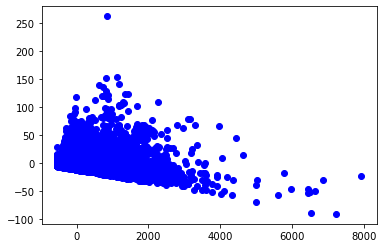

In [48]:
x = new_data[:, 0]
y = new_data[:, 1]

plt.scatter(x, y, c ="blue")
 
# To show the plot
plt.show()

**Finding the amount of variance captured**

The variance captured is the sum of eigenvectors up to r dimensions. In this case, it is the sum of the first two eigenvectors

In [56]:
# use numpy to get the eigenvalues
w, v = np.linalg.eig(cov)

captured_var = w[0] + w[1]
print("Captured Variance by the first two Principal Components:", captured_var)


Captured Variance by the first two Principal Components: 222083.27834682123


The error is the total variance minus the captured variance. The total variance is the sum of all *d* eigenvalues.  

In [61]:
tot_var = sum(w)
error = tot_var - captured_var
fraction = captured_var / tot_var * 100 
print("Approximation Error:", error)
print("The Percentage of Variance Captured by the first 2 PC's:", fraction, "%")

Approximation Error: 92.32746408117237
The Percentage of Variance Captured by the first 2 PC's: 99.95844392378534 %


# Part II: Points in High Dimensional Space